<a href="https://colab.research.google.com/github/Manolo1109/Examen1_AnalisisCuantitativo/blob/main/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np #Librería para manejar arreglos y vectores
import matplotlib.pyplot as plt #Librería para generación de gráficos
import seaborn as sns
import statsmodels.api as sms
import scipy.stats as stats
import pylab
from statsmodels.stats.diagnostic import het_breuschpagan
import math
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('/content/Examen_AC/data_exam1.xlsx', sheet_name = "data1")
df.head()

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


#PUNTO 1
Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.

# Punto1.1
Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.


In [ ]:
df.describe()

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


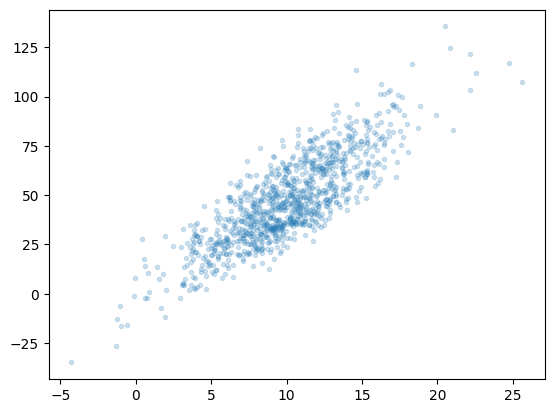

In [ ]:
plt.plot(df["X"], df["Y"], ".", alpha=0.2)

In [ ]:
df.corr()

,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000


In [ ]:
x = df.drop("Y", axis=1)
X =  sms.add_constant(x)
y = df["Y"]

In [ ]:
model = sms.OLS(y, X) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          2.25e-308
Time:                        19:24:36   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.424      -1.143       2.718
X              4.9116      0.091     53.848      0.000       4.733       5.091
Ind          -14.1796      0.858    -16.535      0.000     -15.862     -12.497
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.440
Skew:                           0.078   Prob(JB):                        0.295
Kurtosis:                       3.185   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
residuales = result.resid
residuales

0       3.261586
1       3.227152
2       4.535621
3      -7.938790
4      10.902053
         ...    
995    20.154935
996     5.208588
997   -20.049836
998    14.847336
999     2.314925
Length: 1000, dtype: float64

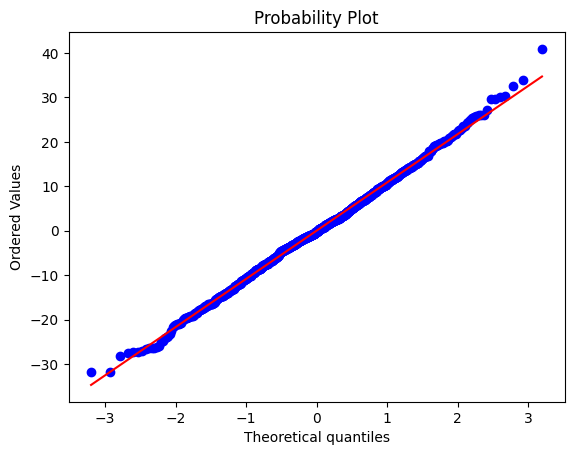

In [ ]:
stats.probplot(residuales, dist="norm", plot=pylab)
pylab.show()

In [ ]:
het_breuschpagan(result.resid, result.model.exog)

(64.60486660135223,
 9.359043491930456e-15,
 34.42986268675474,
 3.4758447737327506e-15)

El modelo de regresión lineal con variable categórica es el siguiente

Se observa que si es un modelo lineal significativo (p value F-statistic<0.05)
Además se observa que los betas para las dos variables independientes son significativos (p-value <0.005)

y = 0.7873 + 4.9116*X -14.1796*Ind

El modelo cumple el supuesto de errores independientes, es decir, no hay correlacion entre los errores del modelo, por lo tanto son independientes (Durbin-Watson = 1.997)

En el modelo, también se observa que los errores distribuyen normal con media cero y varianza constante (p-value Jarque-Bera = 0.299)

Se observa que respecto al supuesto de homocedasticidad de los errores, el modelo no cumple, es decir, tiene una varianza no constante (p-value breuchpagan < 0.05).

#Punto 1.2
Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

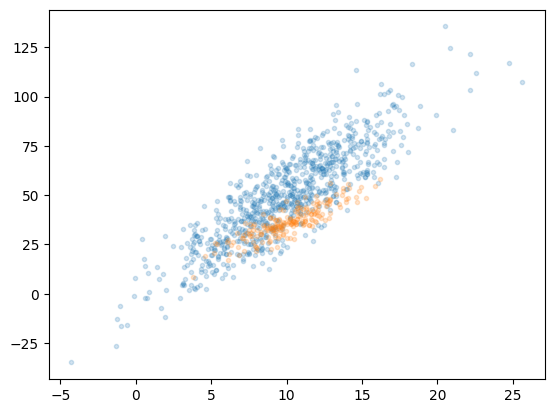

In [ ]:
df_cero = df.query('Ind == 0')
df_uno = df.query('Ind == 1')

plt.plot(df_cero["X"], df_cero["Y"], ".", alpha=0.2)
plt.plot(df_uno["X"], df_uno["Y"], ".", alpha=0.2)

In [ ]:
cov_XY_cero = np.cov(df_cero["X"], df_cero["Y"])[0, 1]
var_X_cero = np.var(df_cero["X"], ddof=1)

beta1_cero = cov_XY_cero/var_X_cero

beta1_cero

5.041128533994832

In [ ]:
cov_XY_uno = np.cov(df_uno["X"], df_uno["Y"])[0, 1]
var_X_uno = np.var(df_uno["X"], ddof=1)

beta1_uno = cov_XY_uno/var_X_uno

beta1_uno

3.1944885147919866

De acuerdo al gráfico de dispersión de la muestra discriminando las categorias de Ind, se observa un cambio en la tasa media de Y condicionado los incrementos de X, además al calcular la pendiente de cada categoría se corrobora lo anterior: beta1_cero = 5.04 y beta1_uno = 3.19

#PUNTO 2

Considere el conjunto de datos “data2” del fichero data_exam1.xlsx

##Punto 2.1

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bivariante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

In [ ]:
df_punto2 = pd.read_excel('/content/Examen_AC/data_exam1.xlsx', sheet_name = "data2")
df_punto2.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


In [ ]:
df_punto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df_punto2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


(array([733., 171.,  52.,  24.,  11.,   6.,   0.,   0.,   2.,   1.]),
 array([1.34372911e-08, 9.39746626e-02, 1.87949312e-01, 2.81923961e-01,
        3.75898610e-01, 4.69873259e-01, 5.63847908e-01, 6.57822558e-01,
        7.51797207e-01, 8.45771856e-01, 9.39746505e-01]),
 <BarContainer object of 10 artists>)

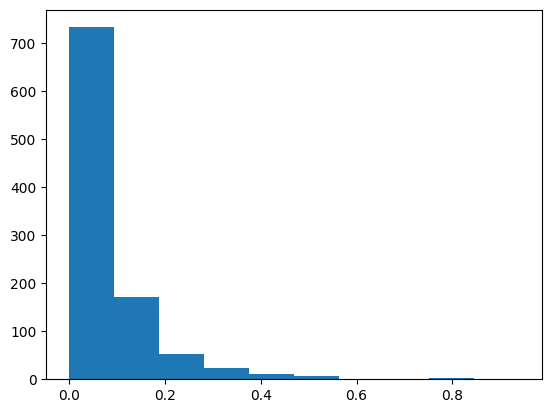

In [ ]:
plt.hist(df_punto2["X"])

(array([  3.,   1.,   8.,  10.,  42.,  80., 227., 351., 233.,  45.]),
 array([-12.07323856,  -9.08203587,  -6.09083318,  -3.09963048,
         -0.10842779,   2.8827749 ,   5.8739776 ,   8.86518029,
         11.85638298,  14.84758567,  17.83878837]),
 <BarContainer object of 10 artists>)

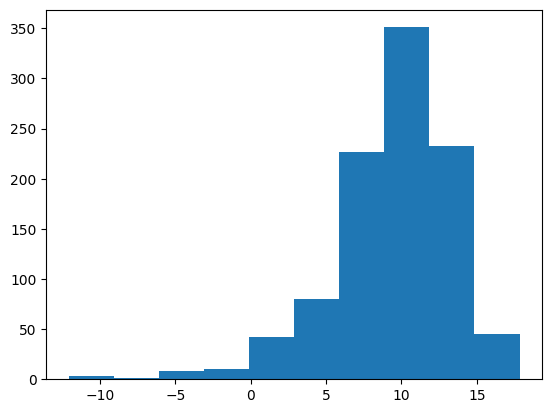

In [ ]:
plt.hist(df_punto2["Y"])

In [ ]:
df_punto2.kurt()

Y     2.452048
X    13.904612
dtype: float64

In [ ]:
df_punto2.skew()

Y   -1.103681
X    2.952165
dtype: float64

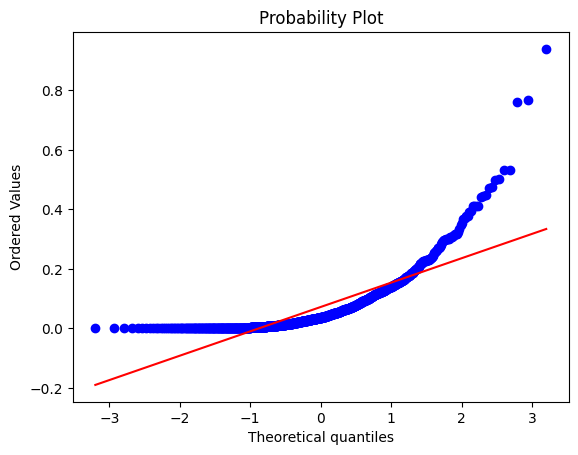

In [ ]:
stats.probplot(df_punto2["X"], dist="norm", plot=pylab)
pylab.show()

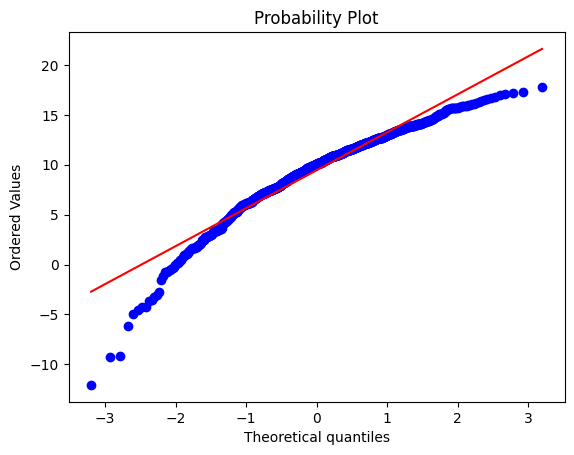

In [ ]:
stats.probplot(df_punto2["Y"], dist="norm", plot=pylab)
pylab.show()

In [ ]:
res_shapiro_x = stats.shapiro(df_punto2["X"])
res_shapiro_x

ShapiroResult(statistic=0.7050634026527405, pvalue=1.3154746787086258e-38)

In [ ]:
res_shapiro_y = stats.shapiro(df_punto2["Y"])
res_shapiro_y

ShapiroResult(statistic=0.9445497989654541, pvalue=6.687931028371396e-19)

Para la variable X:
-De acuerdo con lo observado en el histograma se observa que la distribución es asimetrica hacía la derecha, lo cuál también se corrobora con el coeficiente de asimetría de 2.952165, adicionalmente se observa que es leptocurtica por su coeficiente de curtosis cuyo valor es 13.904612.

Para la variable Y:
-De acuerdo con lo observado en el histograma se observa que la distribución es asimetrica hacía la izquierda lo cuál también se corrobora con el coeficiente de asimetría de -1.103681, adicionalmente se observa que es mesocurtica por su coeficiente de curtosis cuyo valor es 2.452048.

Por medio del estadistico Shapiro Wilks se corrobora que ni la variable X ni la variable Y siguen una distribución normal (los p-value para ambos casos son menores a un nivel de significancia de 0.05)

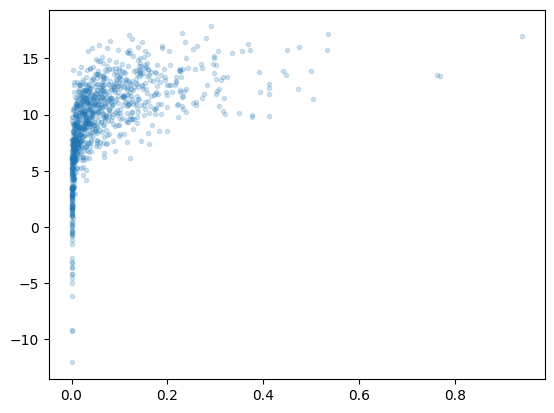

In [ ]:
plt.plot(df_punto2["X"], df_punto2["Y"], ".", alpha=0.2)

In [ ]:
df_punto2.corr("pearson")

,Y,X
Y,1.000000,0.520376
X,0.520376,1.000000


In [ ]:
df_punto2.corr("spearman")

,Y,X
Y,1.000000,0.767833
X,0.767833,1.000000


In [ ]:
df_punto2.corr("kendall")

,Y,X
Y,1.000000,0.580777
X,0.580777,1.000000


De acuerdo con el gráfico de dispersión se puede concluir que las variables X y Y no se relacionan linealmente, lo que se corrobora con el coeficiente de correlación de person, sin embargo al realizar la corelación con spearman se observa que si hay una correlación pero no del tipo lineal.

##Punto 2.2
De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior,  proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modelo

In [ ]:
#df_punto2["Y"] = df_punto2["Y"].apply(lambda x: math.log(x))
#df_punto2_transform_y = df_punto2["Y"] .apply(lambda x: math.log(x))

def limpiar_ceros(frame):
  for col in frame.columns:
    frame[col] = frame[col].apply(lambda x: np.NaN if x <= 0 else x)
  return frame

def eliminar_nan(frame):
  return frame.dropna()

def calcular_ln(frame):
  for col in frame.columns:
    frame[col] = frame[col].apply(lambda x: math.log(x))
  return frame

df_copy = df_punto2.copy()

df_copy = df_copy.pipe(limpiar_ceros).pipe(eliminar_nan).pipe(calcular_ln)

#df_transform_x = calcular_ln(df_punto2["X"])
#df_transform_y = calcular_ln(df_punto2["Y"])

<ipython-input-92-61c65a2de39c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[col] = frame[col].apply(lambda x: math.log(x))


In [ ]:
df_copy

,Y,X
0,2.500546,-1.482996
1,2.500407,-2.419815
2,2.466632,-1.614106
3,1.746070,-5.569607
4,1.949756,-5.387539
...,...,...
994,2.345453,-3.622754
995,2.330507,-2.926485
997,2.627967,-2.616688
998,2.639982,-2.464177


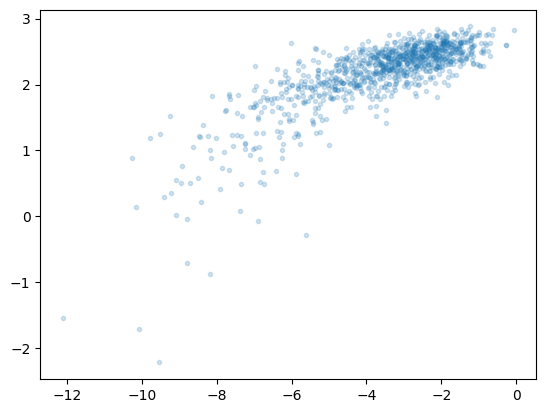

In [ ]:
plt.plot(df_copy["X"], df_copy["Y"], ".", alpha=0.2)

In [ ]:
df_copy.corr()

,Y,X
Y,1.000000,0.792808
X,0.792808,1.000000


Se observó que las variables tenían una relación exponencial, por lo tanto se aplica la función logaritmo tanto a X como a Y. Es menester resaltar que la función logaritmo con valores menores o iguales a 0 genera error, por lo que se decidió sacar los valores menores o iguales a cero del dataset teniendo en cuanta que al sacar estos valores no se distorsiona la tendencia exponencial.

In [ ]:
y_punto2 = df_copy["Y"]
x_punto2 = df_copy["X"]

X_punto2 =  sms.add_constant(x_punto2)

model_punto2 = sms.OLS(y_punto2, X_punto2) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result_punto2 = model_punto2.fit()

result_punto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1650.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          6.87e-212
Time:                        14:03:21   Log-Likelihood:                -287.35
No. Observations:                 977   AIC:                             578.7
Df Residuals:                     975   BIC:                             588.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0144      0.023    130.895      0.000       2.969       3.060
X              0.2296      0.006     40.618      0.000       0.219       0.241
==============================================================================
Omnibus:                      574.049   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10295.872
Skew:                          -2.320   Prob(JB):                         0.00
Kurtosis:                      18.212   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

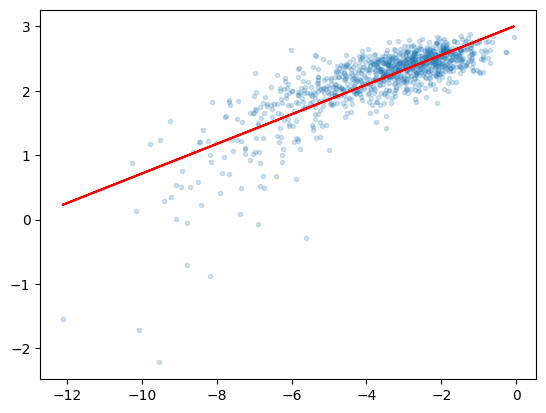

In [ ]:
y_pred = result_punto2.predict()
plt.plot(df_copy["X"], df_copy["Y"], ".", alpha=0.2)
plt.plot(df_copy["X"], y_pred, label='Modelo OLS', color='red')

In [ ]:
het_breuschpagan(result_punto2.resid, result_punto2.model.exog)

(101.78977495378273,
 6.173801353514693e-24,
 113.39564797097445,
 3.989025750460905e-25)

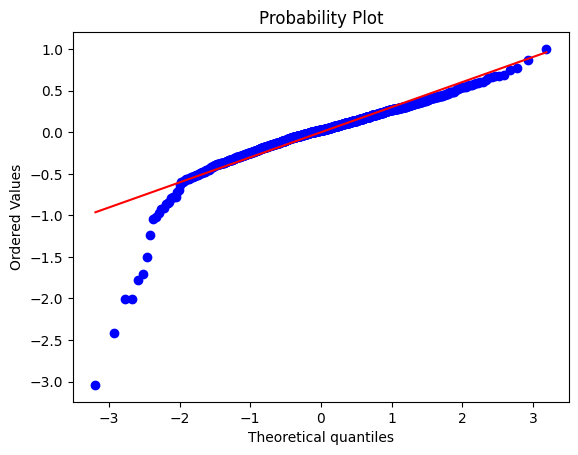

In [ ]:
stats.probplot(result_punto2.resid, dist="norm", plot=pylab)
pylab.show()

El modelo de regresión lineal es el siguiente

Se observa que si es un modelo lineal significativo (p value F-statistic<0.05)
Además se observa que los betas para las dos variables independientes son significativos (p-value <0.005)

y = 3.0144 + 0.2296*X

El modelo cumple el supuesto de errores independientes, es decir, no hay correlacion entre los errores del modelo, por lo tanto son independientes (Durbin-Watson = 1.984)

En el modelo se observa que los errores no distribuyen normal con media cero y varianza constante (p-value Jarque-Bera < 0.05)

Se observa que respecto al supuesto de homocedasticidad de los errores, el modelo no cumple, es decir, tiene una varianza no constante (p-value breuchpagan < 0.05).

Como conclusión, dado que dos supuestos de los residuales no se cumplen entonces el modelo de regresión lineal no sirve para que x prediga linealmente a y

#PUNTO 3

Considere el conjunto de datos “Wine Quality” del fichero datos.xls. Defina como variable respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.

#Punto 3.1
Estandarice las variables, calcule las matrices de correlación de Pearson y compárelas ¿Qué diferencia encuentra entre las estructuras de dependencias obtenidas?

In [ ]:
df_punto3 = pd.read_excel('/content/Examen_AC/datos.xls', sheet_name = "Wine Quality", header=2)
df_punto3.head()

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
df_punto3.shape

(4898, 12)

In [ ]:
df_punto3 = df_punto3.drop(["pH", "Sulfatos", "Cloruros", "Acidez Volátil", "Acidez Fija", "Calidad del Vino"], axis=1)
df_punto3.head()

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.36,20.7,45.0,170.0,1.0010,8.8
1,0.34,1.6,14.0,132.0,0.9940,9.5
2,0.40,6.9,30.0,97.0,0.9951,10.1
3,0.32,8.5,47.0,186.0,0.9956,9.9
4,0.32,8.5,47.0,186.0,0.9956,9.9


In [ ]:
y = df_punto3["Densidad"]

In [ ]:
df_punto3_estandarizado = stats.zscore(df_punto3, axis=1)
df_punto3_estandarizado

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,-0.680780,-0.339861,0.067432,2.162562,-0.670036,-0.539317
1,-0.548896,-0.522362,-0.261241,2.223625,-0.535124,-0.356003
2,-0.700932,-0.509762,0.169626,2.140146,-0.683430,-0.415648
3,-0.630959,-0.507482,0.073675,2.171876,-0.620761,-0.486349
4,-0.630959,-0.507482,0.073675,2.171876,-0.620761,-0.486349
...,...,...,...,...,...,...
4893,-0.657569,-0.617298,0.071315,2.161746,-0.636015,-0.322178
4894,-0.669929,-0.542922,0.271649,2.116901,-0.659375,-0.516324
4895,-0.637805,-0.612316,0.114476,2.158579,-0.617552,-0.405382
4896,-0.611874,-0.591391,-0.107486,2.196822,-0.594241,-0.291831


<Axes: >

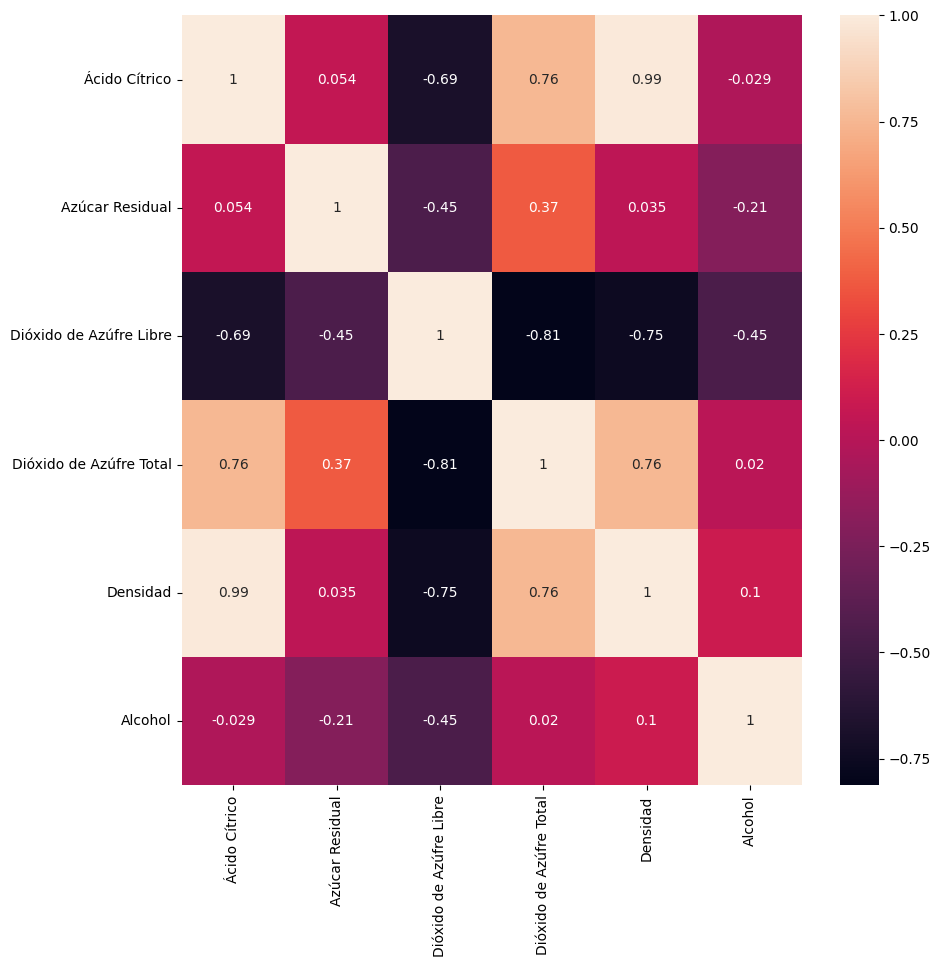

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_punto3_estandarizado.corr("pearson"), annot = True)

<Axes: >

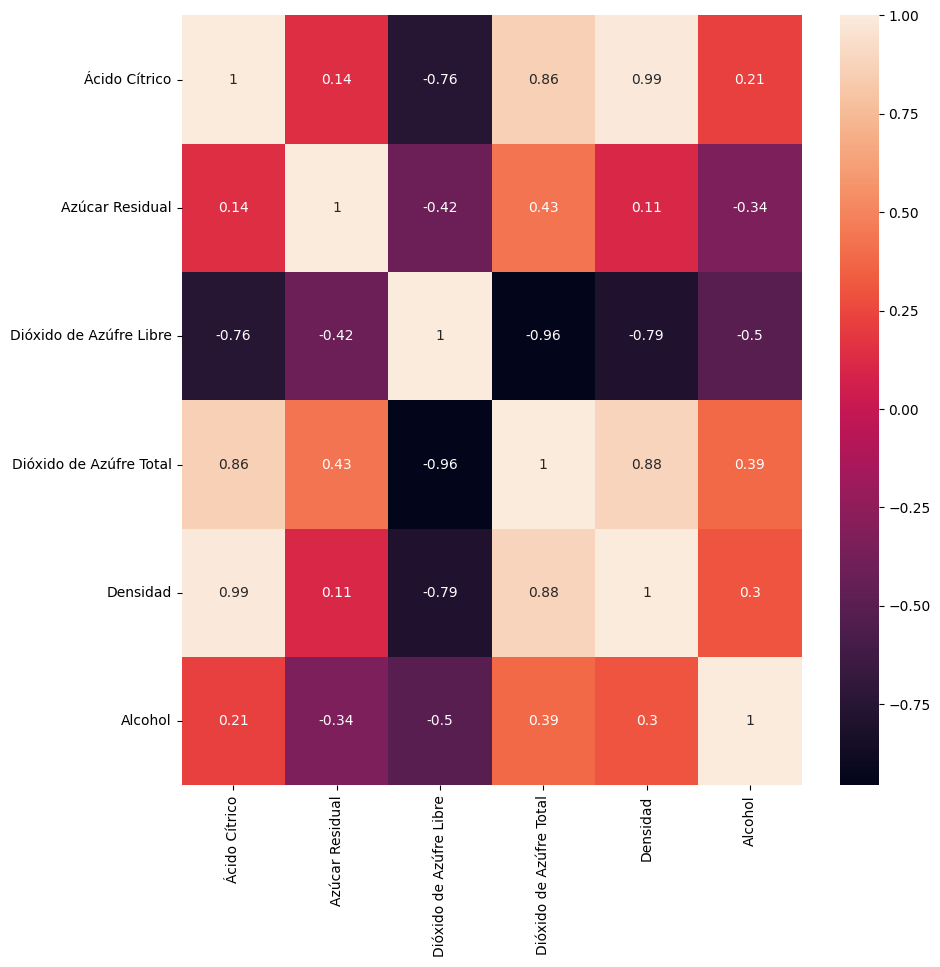

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_punto3_estandarizado.corr("spearman"), annot = True)

<Axes: >

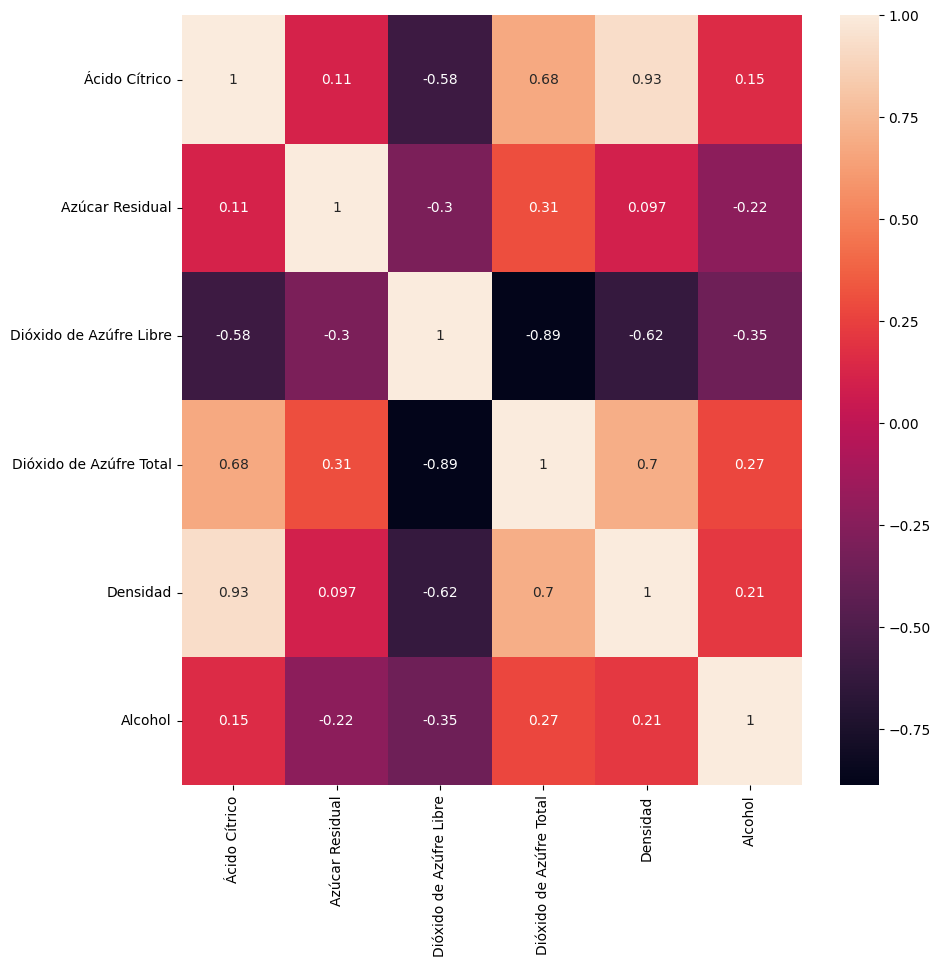

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_punto3_estandarizado.corr("kendall"), annot = True)

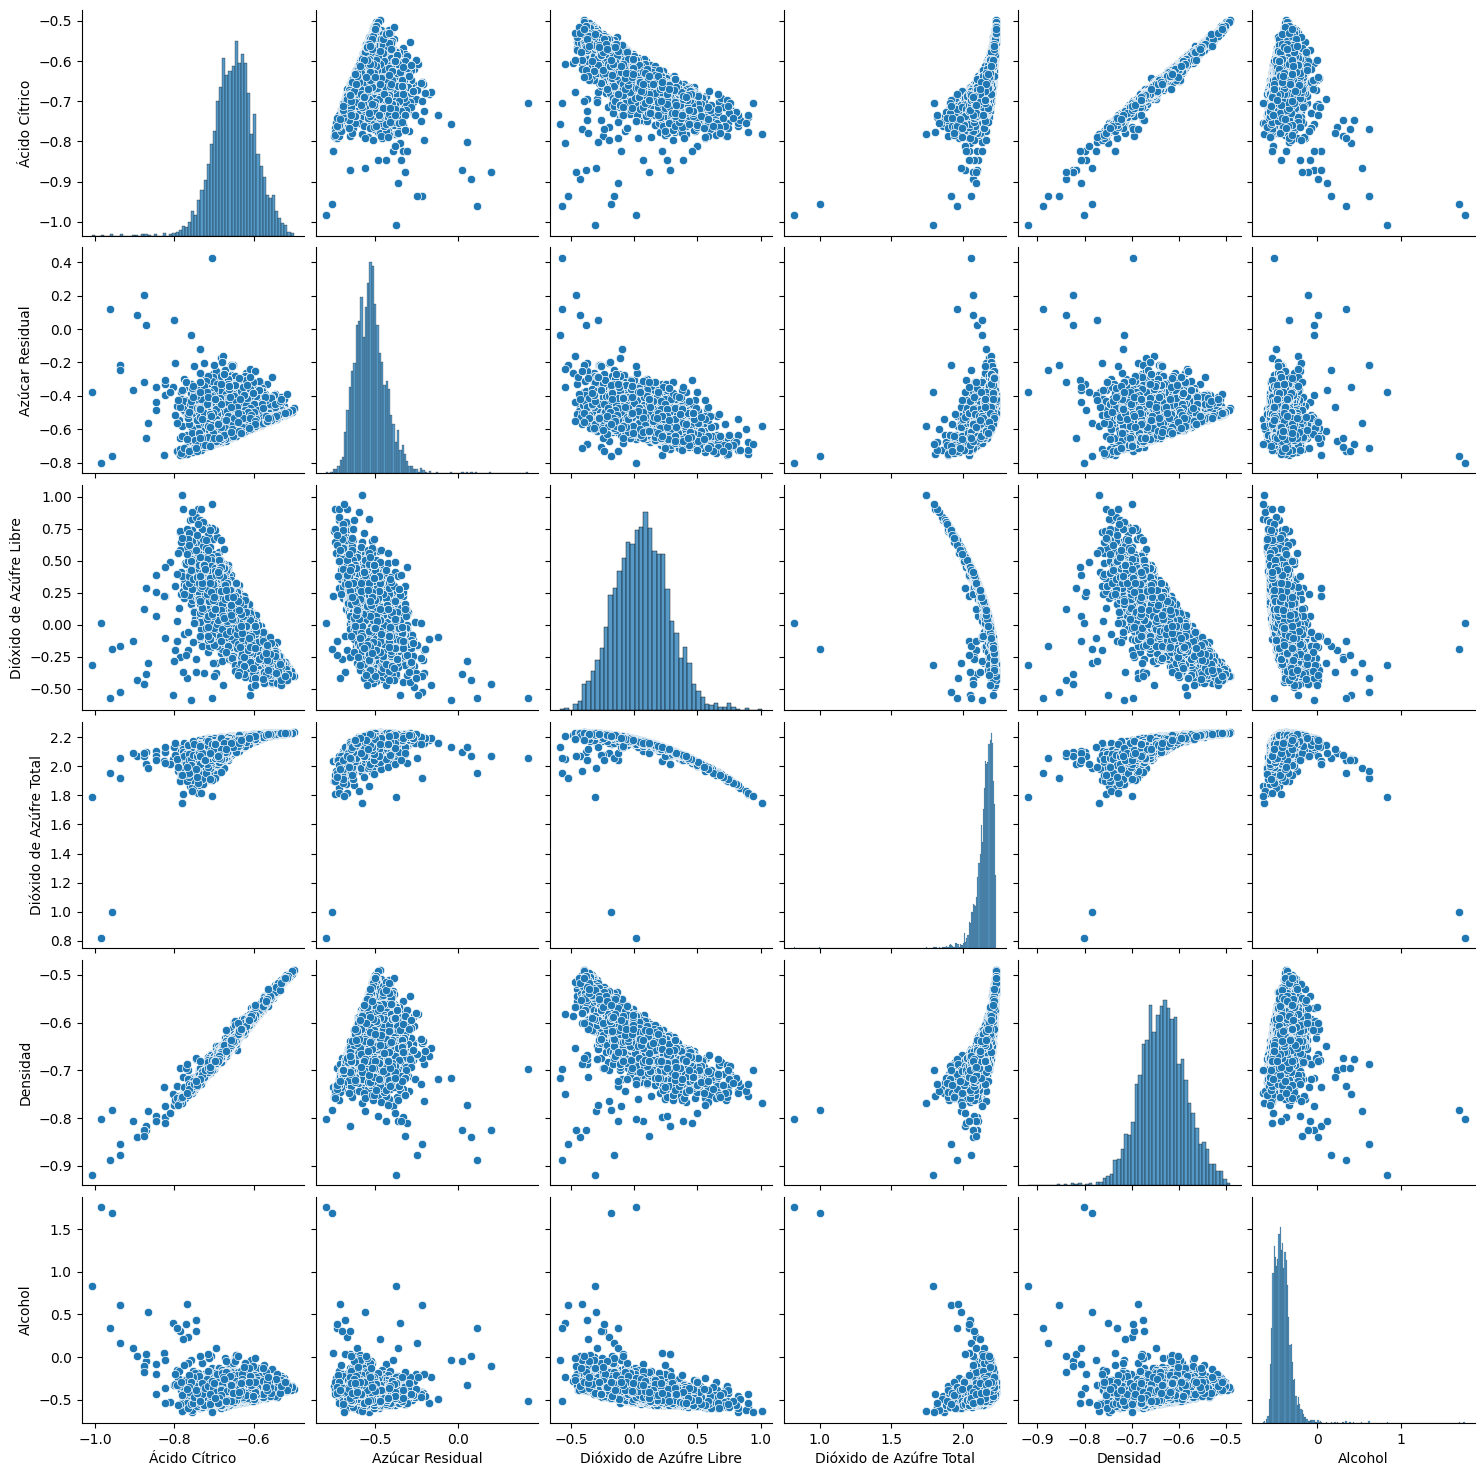

In [ ]:
sns.pairplot(df_punto3_estandarizado)

Se observa que la relación entre ácido cítrico y densidad estuvo bien estimada por pearson y sparman dado que es una relación lineal positiva, en cambio Kendall subestimo un poco esta relación.

Por otro lado, se observa que la relación entre dioxido de azufre total y dioxido de azufre libre no es lineal, pero si de la forma curvilinea inversa, spearman la estima muy bien, kendall subestima un poco respecto a spearman, pero también observa que hay un relación de algún tipo, mientras que pearson, para este caso, no estima de una manera tan precisa como kendall y spearman.

In [ ]:
Y3 = df_punto3_estandarizado["Densidad"]
X3 = df_punto3_estandarizado
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42)